**E-commerce Customer Segmentation**
Problem Statement
Given the e-commerce data, use k-means clustering algorithm to cluster customers with similar interest.

In [25]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings

In [5]:
# Load and read the dataset
data = pd.read_csv("C:\\Users\\sanja\\Downloads\\E_commerce_data.csv",encoding="ISO-8859-1")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France


In [6]:
# Understanding Data
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Data Cleaning**

In [8]:
# Checking For Duplicates
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12-01-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12-01-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12-01-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12-01-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12-01-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12-09-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12-09-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12-09-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12-09-2011 11:34,2.10,14446.0,United Kingdom


In [9]:
# Checking Null Values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# Filling NaN values with mode
df['Description'] = df['Description'].fillna(df['Description'].mode()[0])
df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].mode()[0])

In [13]:
# Checking Null Values
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Data Visualization**

In [15]:
df.Country.value_counts().head()

Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64

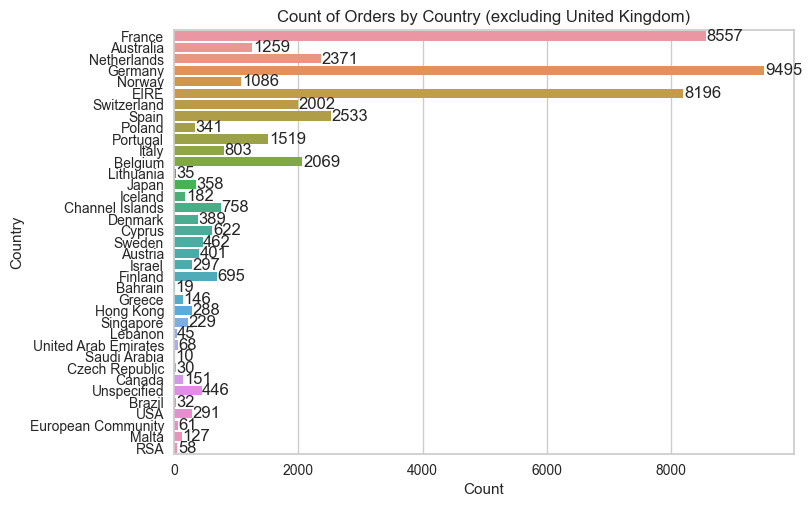

In [22]:
# Plot to check the count of customers except united kingdom
# Filter the DataFrame to exclude United Kingdom
df_filtered = df[df['Country'] != 'United Kingdom']

# Plot the countplot using the filtered DataFrame
ax = sns.countplot(data=df_filtered, y='Country')

# Annotate the count values on the countplot
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 10, p.get_y() + p.get_height() / 2), ha = 'left', va = 'center')

# Set the labels and title of the plot
ax.set_xlabel('Count')
ax.set_ylabel('Country')
ax.set_title('Count of Orders by Country (excluding United Kingdom)')

# Show the plot
plt.show()


**Checking for duplicate entries and deleting them**

In [26]:
df['Country'].duplicated().value_counts()

Country
True     541871
False        38
Name: count, dtype: int64

In [27]:
df['InvoiceNo'].duplicated().value_counts()

InvoiceNo
True     516009
False     25900
Name: count, dtype: int64

In [28]:
df.duplicated().sum()

5268

In [29]:
df.drop_duplicates(inplace = True)
df.shape

(536641, 8)

**Doing NLP in the description column**

In [30]:
#removing spaces & number -converting to small letters
df["Desc_new"]=df["Description"].str.replace("[^a-zA-Z]","  ")
df["Desc_new"]=df["Desc_new"].astype(str)
df["Desc_new"]

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Desc_new, Length: 536641, dtype: object

In [31]:
df["Desc_new"]=df["Desc_new"].apply(lambda row:" ".join([word for word in row.split() if len(word)>2]))
df["Desc_new"]

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904                  PACK SPACEBOY NAPKINS
541905            CHILDREN'S APRON DOLLY GIRL
541906           CHILDRENS CUTLERY DOLLY GIRL
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908             BAKING SET PIECE RETROSPOT
Name: Desc_new, Length: 536641, dtype: object

In [32]:
df["Desc_new"]=[review.lower() for review in df["Desc_new"]]
df["Desc_new"]

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
541904                  pack spaceboy napkins
541905            children's apron dolly girl
541906           childrens cutlery dolly girl
541907        childrens cutlery circus parade
541908             baking set piece retrospot
Name: Desc_new, Length: 536641, dtype: object

**Removing Stop words ,lemmatising**

In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stopwrds =stopwords.words('english')

#Making cutom list of stop words to be removed
addwrds=[]

#Adding to thelist of words
stopwrds.extend(addwrds)

#Function to remove stop words
def remove_stopwrds(rev):
  review_tokenized=word_tokenize(rev)
  rev_new=" ".join([i for i in review_tokenized if i not in stopwrds])
  return rev_new


#Removing Stop words
df['Desc_new']=[remove_stopwrds(r) for r in df['Desc_new']]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#Begin Lemmatisation
nltk.download("wordnet")
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

#function to convert nltk tag to wordnet tag
lemmatizer=WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startwith('J'):
    return wordnet.ADJ
  elif nltk_tag.startwith('V'):
    return wordnet.VERB
  elif nltk_tag.startwith('N'):
    return wordnet.NOUN
  elif nltk_tag.startwith('R'):
    return wordnet.ADJ
  else:
    return None


def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_-word_tokenize(sentence))
  wordnet_tagged=map(lambda x:(x[0],nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)

  lemmatized_sentence = []
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
     lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)


  df["Desc_new"]=df['Desc_new'].apply(lambda x:lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sanja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [35]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,white hanging heart t-light holder
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,red woolly hottie white heart .


In [37]:
#Removing duplicated descriptions
df2=df["Desc_new"].drop_duplicates()
df2=pd.DataFrame(df2)
df2.head()

,Desc_new
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart .


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

count_vectorizer = CountVectorizer(binary=False)
bag_of_words = count_vectorizer.fit_transform(df2["Desc_new"])

feature_names = list(count_vectorizer.vocabulary_.keys())
df3 = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)

df3.head()

,white,hanging,heart,light,holder,metal,lantern,cream,cupid,hearts,...,16960,dotcomstock,16963,john,lewis,puncture,perfectly,17099,17104,birdie
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
x=bag_of_words.toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

**Using K-means clustering**

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("fivethirtyeight")

from warnings import filterwarnings
filterwarnings("ignore")

In [46]:
#To find the optimal value of K we are use Elbow plot ,where k is the hyperparameter.

list_k=list(range(1,25))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

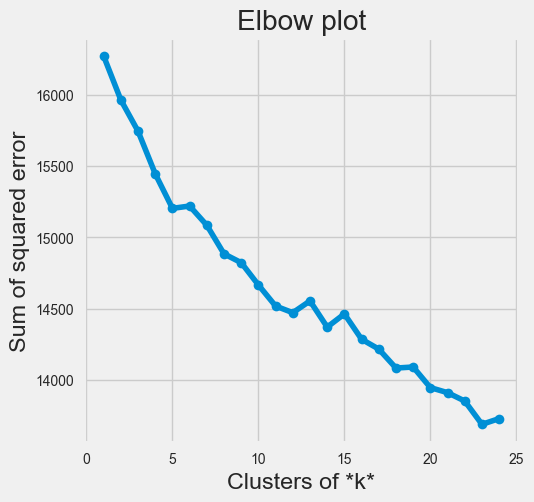

In [47]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

Here we used Kmeans to find the optimal vlaue of K Since there is no optimal value that can be infered here with the elbow plot we will do PCA.(Principal Component Analysis)

In [48]:
sc=StandardScaler()   #performing standarisation  
X_scaled= sc.fit_transform(x)

In [49]:
from sklearn.decomposition import PCA
components= None
pca=PCA(n_components = components)    #components is the number of reduced relevant columns (hyperparameter) 
pca.fit(x)  

PCA()

In [50]:
#prints the  variance
print("Variances(Percentage)")
print(pca.explained_variance_ratio_*100)


Variances(Percentage)
[2.33146744e+00 1.87076368e+00 1.60774228e+00 ... 3.58527323e-34
 1.82996065e-34 2.89790482e-35]


In [51]:
print ("cumulative variance (Percentage)")
print((pca.explained_variance_ratio_.cumsum() * 100)[:100])

cumulative variance (Percentage)
[ 2.33146744  4.20223112  5.8099734   7.2645586   8.59807584  9.88446772
 11.11857616 12.20487733 13.25839299 14.2875643  15.23850107 16.13373423
 16.98200646 17.80755562 18.61810598 19.38504708 20.14273431 20.86046995
 21.5720172  22.27663296 22.96163038 23.63374887 24.28766044 24.9240724
 25.54471266 26.16349775 26.77696934 27.3623237  27.92132078 28.47459214
 29.01614978 29.54433183 30.05869827 30.57019371 31.06771441 31.55172633
 32.03165174 32.51058096 32.97989777 33.43713765 33.88540499 34.32737063
 34.75738349 35.18240402 35.6040492  36.01438146 36.41923228 36.81565111
 37.19948639 37.57986517 37.95407703 38.31114803 38.66476331 39.01149658
 39.35500957 39.68797245 40.01569237 40.34185401 40.66210491 40.97788006
 41.29116515 41.59947982 41.90466888 42.20897897 42.507792   42.80328099
 43.09377539 43.38253531 43.66556709 43.9480333  44.22388929 44.49756764
 44.76647651 45.03401341 45.30028848 45.56041577 45.81951632 46.07426764
 46.32807077 46.577

Text(0, 0.5, 'Explained variance(%)')

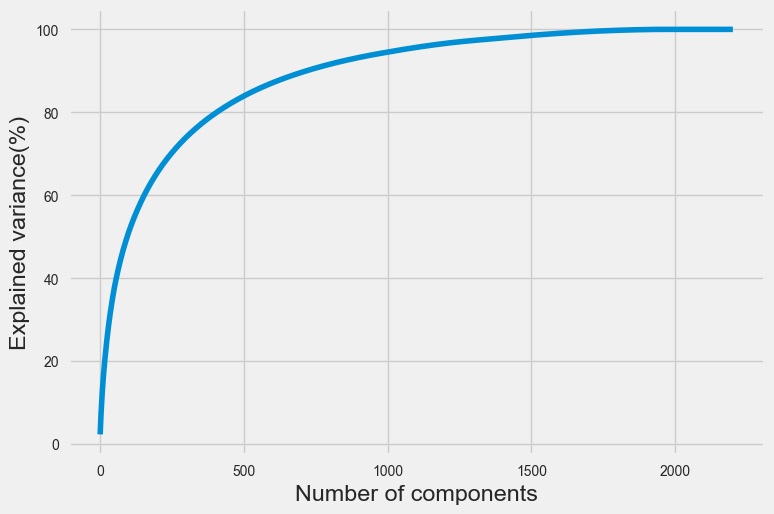

In [52]:
#plot the cumulative varience
components=len(pca.explained_variance_ratio_)\
  if components  is None else components
plt.plot(range(1,components+1),
         np.cumsum(pca.explained_variance_ratio_*100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance(%)")


Number of components: 718


Text(0, 0.5, 'Explained variance (%)')

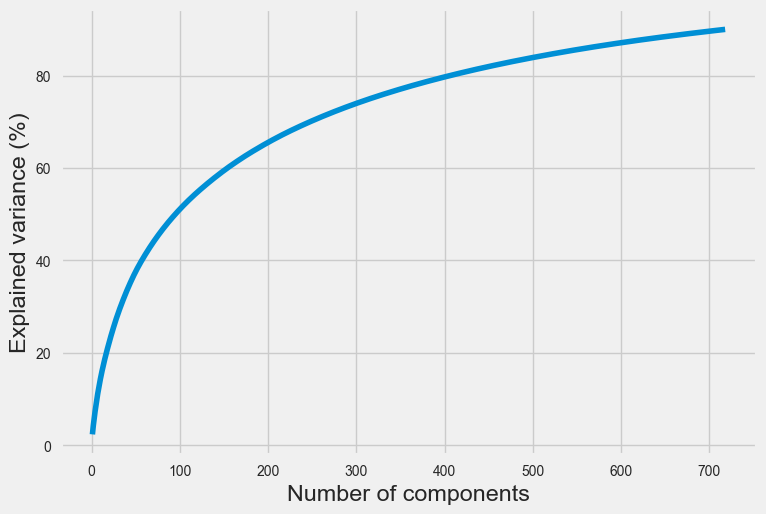

In [53]:
#From the above graph we can see that it takes 1500 components to reach flat curve(100% varience).
# choosing around  90% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.90)
pca.fit(x)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Applying PCA: PCA helps in lower dimension of data,while keeping all original variables in the model.

In [54]:
from sklearn.decomposition import PCA

pca=PCA(638)
Principal_Component_Analysis=pca.fit_transform(x)
Principal_Component_Analysis.shape

(4112, 638)

In [55]:
#Elbow plot
#We make a plot btwn K value and inertia

list_k=list(range(1,20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(x)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

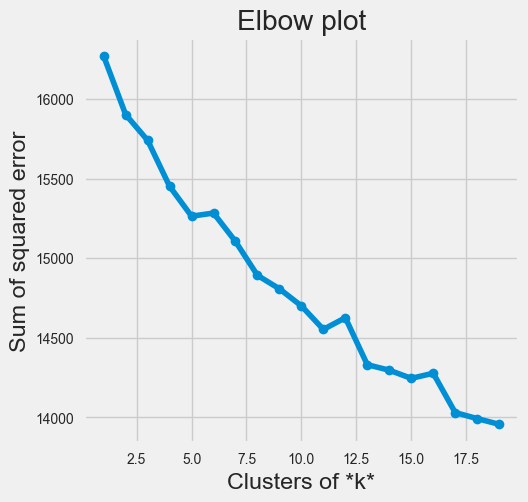

In [56]:
# Make elbow plot
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

In [57]:
#km modelling
km=KMeans(n_clusters=12)         #applying k
km.fit(Principal_Component_Analysis )   #fit the data

centroids = km.cluster_centers_

In [58]:
#shows which group each datapoint belongs to
km.labels_

array([11,  1,  8, ...,  8, 11,  8])

In [59]:
#Predicts the labels of cluster
label=km.fit_predict(Principal_Component_Analysis)
print(label)

[7 1 1 ... 1 7 1]


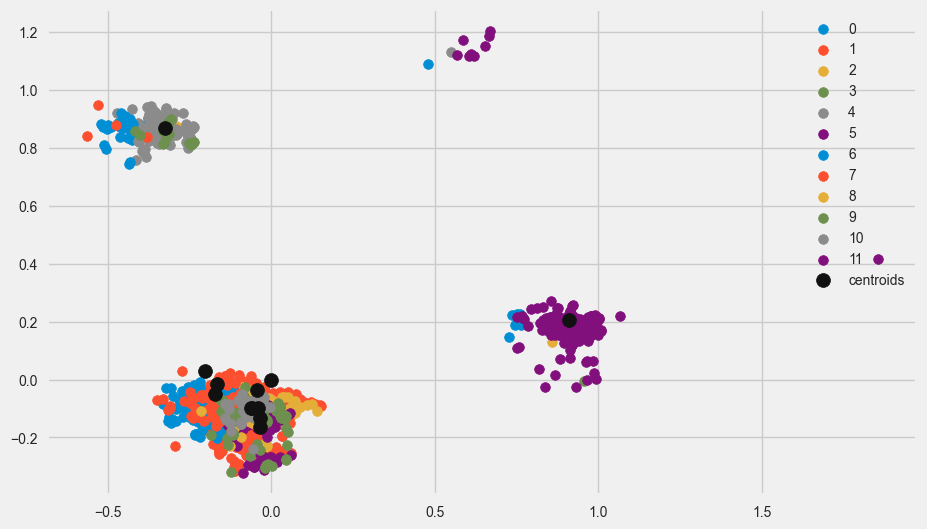

In [60]:
#Getting the centroids 
centroids=km.cluster_centers_
llabels=np.unique(label)

#plotting

plt.figure(figsize=(10,6))
for i in llabels:
  plt.scatter(Principal_Component_Analysis[label == i,0],Principal_Component_Analysis[label == i,1],label =i)
plt.scatter(centroids[:,0],centroids[:,1],s=100,c="k",label="centroids")
plt.legend()
plt.show()

**Concatenating the label,NLP description into original dataframe**

In [62]:
df5=pd.DataFrame(km.labels_)
print(df5.shape)
df5.head()

(4112, 1)


,0
0,7
1,1
2,1
3,1
4,6


In [63]:
df2=df2.reset_index(drop=True)
df2.head()

,Desc_new
0,white hanging heart t-light holder
1,white metal lantern
2,cream cupid hearts coat hanger
3,knitted union flag hot water bottle
4,red woolly hottie white heart .


In [64]:
df6=df2.join(df5)
df6.rename(columns={0:'Product Code'},inplace=True)
df6.head(3)

,Desc_new,Product Code
0,white hanging heart t-light holder,7
1,white metal lantern,1
2,cream cupid hearts coat hanger,1


In [66]:
df8=pd.merge(df,df6,how="left",on="Desc_new")
df8.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,white hanging heart t-light holder,7
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,white metal lantern,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,red woolly hottie white heart .,6


In [67]:
df9 = pd.get_dummies(df8,columns=["Product Code"])     ##product code one hot encoding
df9.head()  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Desc_new,Product Code_0,...,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,white hanging heart t-light holder,False,...,False,False,False,False,False,True,False,False,False,False
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,white metal lantern,False,...,False,False,False,False,False,False,False,False,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,False,...,False,False,False,False,False,False,False,False,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,False,...,False,False,False,False,False,False,False,False,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,red woolly hottie white heart .,False,...,False,False,False,False,True,False,False,False,False,False


In [68]:
df10 = df9.copy()

In [69]:
df10 = df10.drop(["InvoiceNo","StockCode","Description","InvoiceDate","Country","Desc_new"],axis=1)
df10.head()

,Quantity,UnitPrice,CustomerID,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
0,6,2.55,17850.0,False,False,False,False,False,False,False,True,False,False,False,False
1,6,3.39,17850.0,False,True,False,False,False,False,False,False,False,False,False,False
2,8,2.75,17850.0,False,True,False,False,False,False,False,False,False,False,False,False
3,6,3.39,17850.0,False,True,False,False,False,False,False,False,False,False,False,False
4,6,3.39,17850.0,False,False,False,False,False,False,True,False,False,False,False,False


In [71]:
#Grouping the Customers based on CustomerID:
df11 = df10.groupby(['CustomerID']).mean()
df11.head()

,Quantity,UnitPrice,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
CustomerID,,,,,,,,,,,,,,
12346.0,0.000000,1.040000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,13.505495,2.644011,0.005495,0.549451,0.010989,0.000000,0.071429,0.054945,0.054945,0.000000,0.0,0.131868,0.043956,0.076923
12348.0,75.516129,5.764839,0.000000,0.741935,0.064516,0.000000,0.064516,0.032258,0.000000,0.000000,0.0,0.000000,0.000000,0.096774
12349.0,8.643836,8.289041,0.013699,0.452055,0.013699,0.013699,0.013699,0.164384,0.095890,0.013699,0.0,0.000000,0.000000,0.219178
12350.0,11.588235,3.841176,0.000000,0.823529,0.000000,0.000000,0.058824,0.058824,0.000000,0.000000,0.0,0.058824,0.000000,0.000000


In [72]:
df11.describe()

,Quantity,UnitPrice,Product Code_0,Product Code_1,Product Code_2,Product Code_3,Product Code_4,Product Code_5,Product Code_6,Product Code_7,Product Code_8,Product Code_9,Product Code_10,Product Code_11
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,22.402928,7.983743,0.023204,0.522496,0.045449,0.006156,0.034693,0.067827,0.058268,0.035789,0.008059,0.074450,0.015249,0.108359
std,213.256379,144.965539,0.073825,0.189544,0.084367,0.029733,0.053243,0.080414,0.083848,0.073355,0.025226,0.140336,0.037139,0.104855
min,-144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.491504,2.225481,0.000000,0.418987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483
50%,9.500000,2.948017,0.000000,0.523810,0.007609,0.000000,0.020500,0.052632,0.032520,0.006410,0.000000,0.019231,0.000000,0.093023
75%,14.033772,3.899870,0.017755,0.626582,0.059701,0.000000,0.049180,0.098406,0.082126,0.046512,0.000000,0.089352,0.018519,0.155443
max,12540.000000,8055.780000,1.000000,1.000000,1.000000,0.857143,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000


In [74]:
y = df11.to_numpy()
y

array([[0.00000000e+00, 1.04000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.35054945e+01, 2.64401099e+00, 5.49450549e-03, ...,
        1.31868132e-01, 4.39560440e-02, 7.69230769e-02],
       [7.55161290e+01, 5.76483871e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.67741935e-02],
       ...,
       [7.53846154e+00, 4.82153846e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.69230769e-02],
       [1.88210818e+00, 1.62875173e+00, 1.38696255e-03, ...,
        4.66019417e-01, 0.00000000e+00, 5.96393897e-02],
       [2.26571429e+01, 1.49357143e+00, 0.00000000e+00, ...,
        0.00000000e+00, 4.28571429e-02, 2.00000000e-01]])

In [75]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

In [76]:
list_k=list(range(1,15))
inertias = []
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(y_scaled)
    inertias.append(km.inertia_)

Text(0, 0.5, 'Sum of squared error')

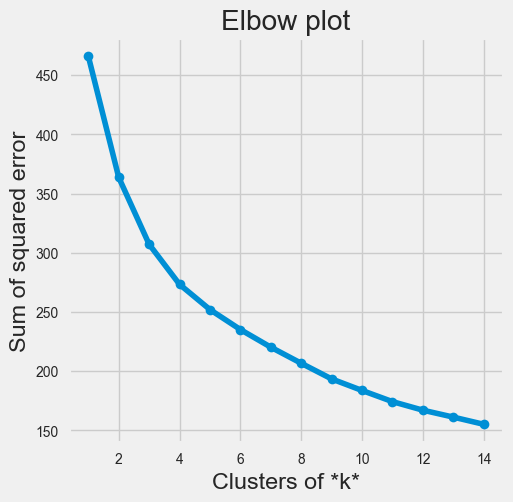

In [77]:
plt.figure(figsize = (5, 5))
plt.title('Elbow plot')
plt.plot(list_k,inertias,'-o')
plt.xlabel('Clusters of *k*')
plt.ylabel('Sum of squared error')

From Elbow plot we can say that the optimal K value is at 4,thus the customers can be clusterd into 4 clusters based on their similarities

In [78]:
km = KMeans(n_clusters=4)     # applying k = 4
km.fit(y_scaled)          # fit the data 

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_)  

inertia:  273.25100662246115


In [79]:
km.labels_ 

array([1, 0, 1, ..., 1, 2, 0])

In [80]:
label = km.fit_predict(y_scaled)  
print(label)

[1 3 1 ... 1 0 3]


**Visualizing the customer clusters:**

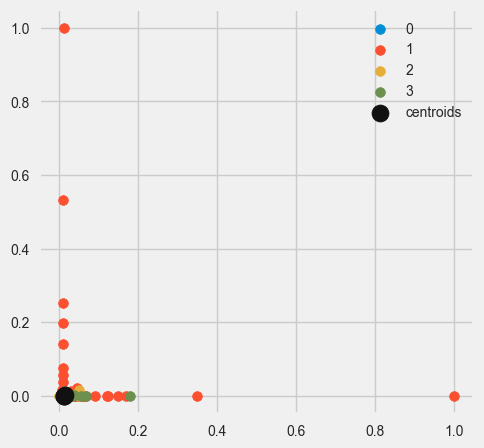

In [81]:

# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

#  plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 0] , y_scaled[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] ,  c="k", s=150, label="centroids")
plt.legend()
plt.show()